In [1]:
pip install nflfastpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import nflfastpy as nfl
from matplotlib import pyplot as plt
import seaborn as sns

import requests
from io import BytesIO

In [3]:
df = nfl.load_pbp_data(2021)

In [4]:
df = df[df["season_type"] == "REG"]

In [5]:
df.columns[100:200]

Index(['away_wp_post', 'vegas_wp', 'vegas_home_wp', 'total_home_rush_wpa',
       'total_away_rush_wpa', 'total_home_pass_wpa', 'total_away_pass_wpa',
       'air_wpa', 'yac_wpa', 'comp_air_wpa', 'comp_yac_wpa',
       'total_home_comp_air_wpa', 'total_away_comp_air_wpa',
       'total_home_comp_yac_wpa', 'total_away_comp_yac_wpa',
       'total_home_raw_air_wpa', 'total_away_raw_air_wpa',
       'total_home_raw_yac_wpa', 'total_away_raw_yac_wpa', 'punt_blocked',
       'first_down_rush', 'first_down_pass', 'first_down_penalty',
       'third_down_converted', 'third_down_failed', 'fourth_down_converted',
       'fourth_down_failed', 'incomplete_pass', 'touchback', 'interception',
       'punt_inside_twenty', 'punt_in_endzone', 'punt_out_of_bounds',
       'punt_downed', 'punt_fair_catch', 'kickoff_inside_twenty',
       'kickoff_in_endzone', 'kickoff_out_of_bounds', 'kickoff_downed',
       'kickoff_fair_catch', 'fumble_forced', 'fumble_not_forced',
       'fumble_out_of_bounds', 'solo

In [305]:
df[["posteam", "defteam", "pass", "rush", "epa"]].head()

,posteam,defteam,pass,rush,epa
0,NaN,NaN,0,0,NaN
1,TEN,ARI,0,0,0.000000
2,TEN,ARI,0,1,-1.399805
3,TEN,ARI,1,0,0.032412
4,TEN,ARI,1,0,-1.532898


In [306]:
df.groupby('posteam')[['epa']].mean().sort_values(by = 'epa', ascending = True)

,epa
posteam,
CAR,-0.128747
NYG,-0.125104
HOU,-0.113739
JAX,-0.094395
NO,-0.089793
CHI,-0.086149
ATL,-0.081332
NYJ,-0.075080
DET,-0.061323


In [452]:
qbs = df.groupby(['passer_player_id', 'passer_player_name'], 
                 as_index = False).agg({'play_id' : 'count', 'epa' : 'mean', 'cpoe' : 'mean', 'third_down_converted' : 'count'})
qbs = qbs.loc[qbs.play_id > 100]

qbs.sort_values('epa', ascending = False, inplace = True)

qbs = qbs.round(2)


qbs

,passer_player_id,passer_player_name,play_id,epa,cpoe,third_down_converted
3,00-0023459,A.Rodgers,287,0.31,6.07,287
67,00-0033873,P.Mahomes,688,0.19,2.67,688
12,00-0026498,M.Stafford,634,0.19,-0.12,634
0,00-0019596,T.Brady,742,0.18,1.72,742
55,00-0033077,D.Prescott,631,0.17,2.33,631
37,00-0031345,J.Garoppolo,472,0.17,2.66,472
113,00-0036442,J.Burrow,573,0.15,6.68,573
111,00-0036355,J.Herbert,710,0.15,-0.55,710
4,00-0023459,Aa.Rodgers,275,0.15,5.58,275
14,00-0027688,C.McCoy,105,0.14,3.52,105


In [332]:
#names_list = ['ID', 'Player', 'Dropbacks', 'EPA', 'CPOE']
#names_list + ['Snaps', 'Sacks', 'Interceptions']
df_wr = df.loc[(df['pass_attempt'] == 1) & (df['air_yards'].notnull())]

df_wr = df.groupby(['receiver_player_id', 'receiver_player_name','posteam'], 
                 as_index = False).agg({'yards_after_catch' : 'sum', 'receiving_yards' : 'sum', 'cpoe' : 'mean'})
df_wr = df_wr.loc[df_wr.receiving_yards >400]
df_wr.sort_values('receiving_yards', ascending = False, inplace = True)


df_wr

,receiver_player_id,receiver_player_name,posteam,yards_after_catch,receiving_yards,cpoe
227,00-0033908,C.Kupp,LA,846.0,1947.0,8.334336
458,00-0036322,J.Jefferson,MIN,482.0,1616.0,3.286424
72,00-0031381,D.Adams,GB,613.0,1553.0,9.343479
533,00-0036900,J.Chase,CIN,651.0,1455.0,3.839490
401,00-0035719,D.Samuel,SF,772.0,1397.0,-3.798273
...,...,...,...,...,...,...
77,00-0031428,A.Robinson,CHI,101.0,410.0,-5.099009
276,00-0034419,B.Berrios,NYJ,242.0,409.0,0.208022
218,00-0033881,E.Engram,NYG,185.0,408.0,-8.755997
332,00-0035208,O.Zaccheaus,ATL,96.0,406.0,-5.522033


In [333]:
top_25 = df_wr.sort_values(by = 'receiving_yards', ascending = False)[:25]
team_logo_colors = nfl.load_team_logo_data()
#top_25['RAC'] = 
df_wr = df_wr.loc[df['receiver_player_id'].isin(top_25['receiver_player_id'])]

top_25 = top_25.merge(team_logo_colors[['team_abbr', 'team_color', 'team_color2']].rename(columns = {'team_abbr': 'posteam'}), on = 'posteam')

df_wr = df_wr.merge(team_logo_colors[['team_abbr', 'team_color', 'team_color2']].rename(columns = {'team_abbr': 'posteam'}), on = 'posteam')

top_25


,receiver_player_id,receiver_player_name,posteam,yards_after_catch,receiving_yards,cpoe,team_color,team_color2
0,00-0033908,C.Kupp,LA,846.0,1947.0,8.334336,#003594,#FFD100
1,00-0036322,J.Jefferson,MIN,482.0,1616.0,3.286424,#4F2683,#FFC62F
2,00-0031381,D.Adams,GB,613.0,1553.0,9.343479,#203731,#FFB612
3,00-0036900,J.Chase,CIN,651.0,1455.0,3.839490,#FB4F14,#000000
4,00-0036410,T.Higgins,CIN,290.0,1091.0,7.061447,#FB4F14,#000000
5,00-0035719,D.Samuel,SF,772.0,1397.0,-3.798273,#AA0000,#B3995D
6,00-0034753,M.Andrews,BAL,458.0,1361.0,6.961380,#241773,#9E7C0C
7,00-0033040,T.Hill,KC,444.0,1239.0,6.144753,#E31837,#FFB612
8,00-0030506,T.Kelce,KC,564.0,1125.0,1.555932,#E31837,#FFB612
9,00-0031588,S.Diggs,BUF,326.0,1225.0,3.145872,#00338D,#C60C30


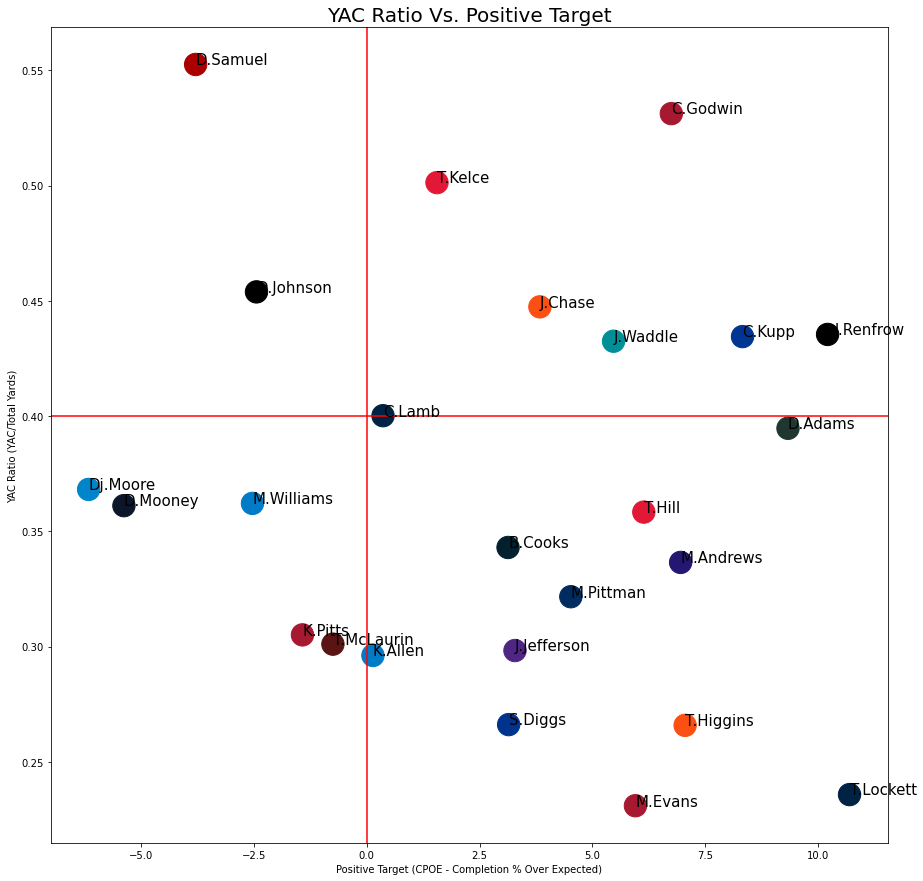

In [334]:
z = top_25['receiver_player_name']
x = top_25['cpoe']
y = top_25['yards_after_catch'] / top_25['receiving_yards']
fig, xy = plt.subplots(figsize = (15,15))
xy.scatter(x, y, s= 500, color = top_25['team_color'])
plt.title("YAC Ratio Vs. Positive Target", fontsize = 20)
plt.xlabel("Positive Target (CPOE - Completion % Over Expected)", fontsize = 10)
plt.ylabel("YAC Ratio (YAC/Total Yards)", fontsize = 10)
i=0
while i <25:
    xy.text(x[i],y[i],z[i], fontsize = 15)
    i = i+1
plt.axvline(x=0, color = 'red')
plt.axhline(y=0.4, color = 'red')
plt.show()

In [427]:
df_wr = df.loc[ (df['pass_attempt'] == 1) & (df['receiving_yards'].notnull())]
df_team = df.loc[(df['pass_attempt'] == 1) & (df['receiving_yards'].notnull())]
df_team = df.groupby(['posteam', 'down'], 
                 as_index = False).agg({'pass_attempt' : 'sum', 'receiving_yards' : 'sum', 'epa' : 'mean'})
df_wr = df.groupby(['receiver_player_id', 'receiver_player_name','posteam', 'down'], 
                 as_index = False).agg({'receiving_yards' : 'sum', 'pass_attempt' : 'sum', 'yards_gained' : 'mean', 'epa' : 'mean'}) 
#df_wr['1down%'] = 1/count
df_wr = df_wr.loc[df_wr.receiving_yards >100]
df_wr = df_wr.loc[df_wr.down >2]
df_team = df_team.loc[df_team.down ==3]
df_team['t_yards'] = df_team['receiving_yards']/ df_team['pass_attempt']
del df_team['receiving_yards']
df_wr.sort_values('receiving_yards', ascending = False, inplace = True)
df_wr = pd.merge(df_wr,df_team, on = 'posteam')
df_wr['team_attempt'] = df_wr['pass_attempt_y']
df_wr['player_attempt'] = df_wr['pass_attempt_x']
df_wr['team_epa'] = df_wr['epa_y']
df_wr['player_epa'] = df_wr['epa_x']
df_wr['p_yards'] = df_wr['yards_gained']
del df_wr['pass_attempt_y']
del df_wr['pass_attempt_x']
del df_wr['down_y']
del df_wr['down_x']
del df_wr['epa_y']
del df_wr['epa_x']
del df_wr['yards_gained']
df_wr

,receiver_player_id,receiver_player_name,posteam,receiving_yards,t_yards,team_attempt,player_attempt,team_epa,player_epa,p_yards
0,00-0036322,J.Jefferson,MIN,628.0,7.105820,189.0,54.0,-0.004031,0.918798,11.629630
1,00-0036345,K.Osborn,MIN,210.0,7.105820,189.0,32.0,-0.004031,-0.205907,6.562500
2,00-0030035,A.Thielen,MIN,176.0,7.105820,189.0,27.0,-0.004031,0.102342,6.518519
3,00-0034270,T.Conklin,MIN,123.0,7.105820,189.0,22.0,-0.004031,-0.310229,5.590909
4,00-0033908,C.Kupp,LA,506.0,8.815287,157.0,42.0,0.105739,0.786103,12.047619
...,...,...,...,...,...,...,...,...,...,...
120,00-0032009,A.Humphries,WAS,129.0,5.417722,158.0,24.0,-0.194087,-0.334110,5.375000
121,00-0036913,K.Toney,NYG,152.0,6.154286,175.0,17.0,-0.097056,0.641139,8.941176
122,00-0033932,K.Golladay,NYG,149.0,6.154286,175.0,19.0,-0.097056,-0.011554,7.842105
123,00-0033881,E.Engram,NYG,149.0,6.154286,175.0,28.0,-0.097056,-0.025720,5.321429


In [428]:
top_25 = df_wr.sort_values(by = 'receiving_yards', ascending = False)[:25]
top_25['target_share'] = top_25['player_attempt']/top_25['team_attempt']
top_25['epa_diff'] = top_25['player_epa'] - top_25['team_epa']
team_logo_colors = nfl.load_team_logo_data()
#top_25['RAC'] = 
df_wr = df_wr.loc[df['receiver_player_id'].isin(top_35['receiver_player_id'])]

top_25 = top_25.merge(team_logo_colors[['team_abbr', 'team_color', 'team_color2']].rename(columns = {'team_abbr': 'posteam'}), on = 'posteam')

df_wr = df_wr.merge(team_logo_colors[['team_abbr', 'team_color', 'team_color2']].rename(columns = {'team_abbr': 'posteam'}), on = 'posteam')

top_25

,receiver_player_id,receiver_player_name,posteam,receiving_yards,t_yards,team_attempt,player_attempt,team_epa,player_epa,p_yards,target_share,epa_diff,team_color,team_color2
0,00-0036322,J.Jefferson,MIN,628.0,7.105820,189.0,54.0,-0.004031,0.918798,11.629630,0.285714,0.922829,#4F2683,#FFC62F
1,00-0033908,C.Kupp,LA,506.0,8.815287,157.0,42.0,0.105739,0.786103,12.047619,0.267516,0.680364,#003594,#FFD100
2,00-0031236,B.Cooks,HOU,459.0,6.556150,187.0,47.0,-0.058537,0.476069,9.765957,0.251337,0.534606,#03202F,#A71930
3,00-0036900,J.Chase,CIN,452.0,8.628049,164.0,37.0,0.053891,0.257485,12.216216,0.225610,0.203594,#FB4F14,#000000
4,00-0033009,T.Boyd,CIN,275.0,8.628049,164.0,27.0,0.053891,0.596604,10.185185,0.164634,0.542713,#FB4F14,#000000
5,00-0033040,T.Hill,KC,429.0,7.827160,162.0,41.0,0.306760,0.949768,10.463415,0.253086,0.643008,#E31837,#FFB612
6,00-0030506,T.Kelce,KC,276.0,7.827160,162.0,35.0,0.306760,0.175270,7.885714,0.216049,-0.131490,#E31837,#FFB612
7,00-0030279,K.Allen,LAC,414.0,7.581006,179.0,48.0,0.138589,0.455041,8.625000,0.268156,0.316452,#007BC7,#ffc20e
8,00-0033536,M.Williams,LAC,299.0,7.581006,179.0,27.0,0.138589,0.766061,11.074074,0.150838,0.627472,#007BC7,#ffc20e
9,00-0031381,D.Adams,GB,404.0,6.644578,166.0,47.0,0.129571,0.523646,8.595745,0.283133,0.394075,#203731,#FFB612


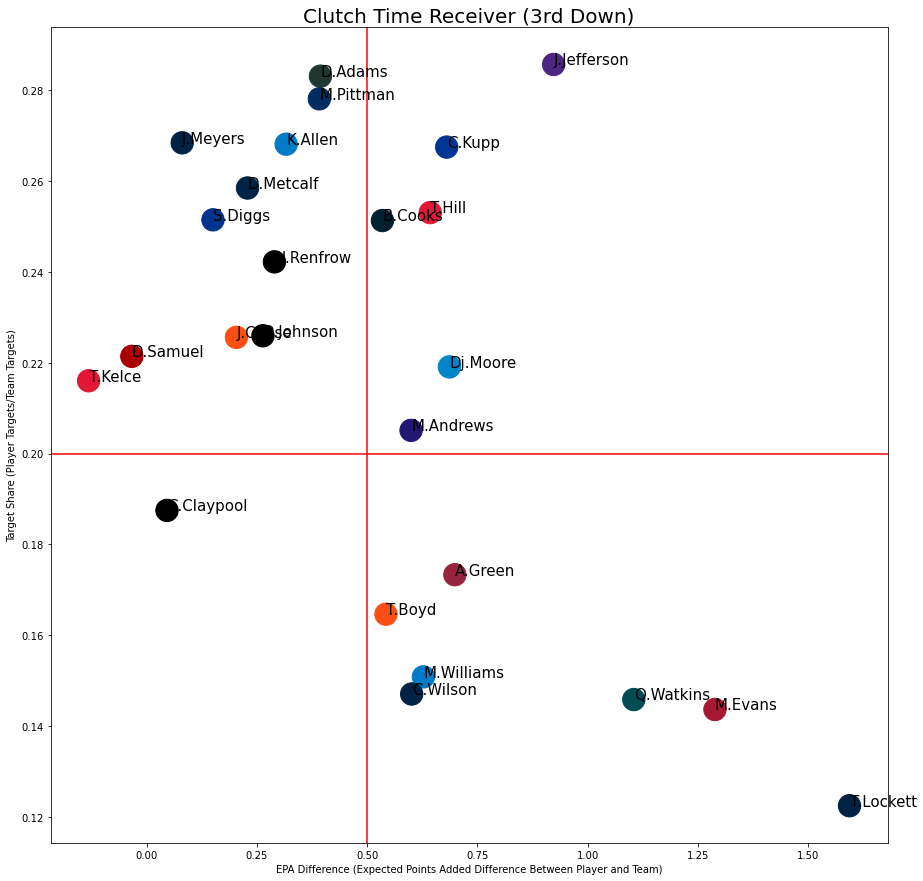

In [429]:
z = top_25['receiver_player_name']
x = top_25['epa_diff']
y = top_25['target_share']
fig, xy = plt.subplots(figsize = (15,15))
xy.scatter(x, y, s= 500, color = top_25['team_color'])
plt.title("Clutch Time Receiver (3rd Down)", fontsize = 20)
plt.xlabel("EPA Difference (Expected Points Added Difference Between Player and Team)", fontsize = 10)
plt.ylabel("Target Share (Player Targets/Team Targets)", fontsize = 10)
i=0
while i <25:
    xy.text(x[i],y[i],z[i], fontsize = 15)
    i = i+1
plt.axvline(x=0.5, color = 'red')
plt.axhline(y=0.2, color = 'red')
plt.show()

In [32]:
df_wr = df.loc[(df['pass_attempt'] == 1) &(df['receiving_yards'].notnull())]
df_wr = df.groupby(['receiver_player_id', 'receiver_player_name','posteam'], 
                 as_index = False).agg({'pass_attempt' : 'count', 'receiving_yards' : 'sum', 'touchdown' : 'mean'})
df_wr['targets'] = df_wr['pass_attempt']
del df_wr['pass_attempt']
df_wr.sort_values('receiving_yards', ascending = False, inplace = True)


df_wr

,receiver_player_id,receiver_player_name,posteam,receiving_yards,touchdown,targets
112,00-0031588,S.Diggs,BUF,1535.0,0.048193,166
74,00-0030506,T.Kelce,KC,1416.0,0.075342,146
78,00-0030564,D.Hopkins,ARI,1407.0,0.037267,161
516,00-0036322,J.Jefferson,MIN,1400.0,0.054688,128
100,00-0031381,D.Adams,GB,1374.0,0.127517,149
...,...,...,...,...,...,...
381,00-0034860,D.Pettis,SF,0.0,0.000000,1
48,00-0029627,J.Crawford,TEN,0.0,0.000000,1
27,00-0027973,A.Dalton,DAL,-3.0,0.000000,1
164,00-0032780,J.Howard,MIA,-3.0,0.000000,1


In [33]:
top_25 = df_wr.sort_values(by = 'receiving_yards', ascending = False)[:35]
team_logo_colors = nfl.load_team_logo_data()
#top_25['RAC'] = 
df_wr = df_wr.loc[df['receiver_player_id'].isin(top_25['receiver_player_id'])]

top_25 = top_25.merge(team_logo_colors[['team_abbr', 'team_color', 'team_color2']].rename(columns = {'team_abbr': 'posteam'}), on = 'posteam')

df_wr = df_wr.merge(team_logo_colors[['team_abbr', 'team_color', 'team_color2']].rename(columns = {'team_abbr': 'posteam'}), on = 'posteam')

top_25

,receiver_player_id,receiver_player_name,posteam,receiving_yards,touchdown,targets,team_color,team_color2
0,00-0031588,S.Diggs,BUF,1535.0,0.048193,166,#00338D,#C60C30
1,00-0029000,C.Beasley,BUF,967.0,0.037037,108,#00338D,#C60C30
2,00-0030506,T.Kelce,KC,1416.0,0.075342,146,#E31837,#FFB612
3,00-0033040,T.Hill,KC,1276.0,0.111111,135,#E31837,#FFB612
4,00-0030564,D.Hopkins,ARI,1407.0,0.037267,161,#97233F,#000000
5,00-0036322,J.Jefferson,MIN,1400.0,0.054688,128,#4F2683,#FFC62F
6,00-0030035,A.Thielen,MIN,925.0,0.127273,110,#4F2683,#FFC62F
7,00-0031381,D.Adams,GB,1374.0,0.127517,149,#203731,#FFB612
8,00-0034837,C.Ridley,ATL,1374.0,0.062069,145,#A71930,#000000
9,00-0035640,D.Metcalf,SEA,1303.0,0.077519,129,#002244,#69be28


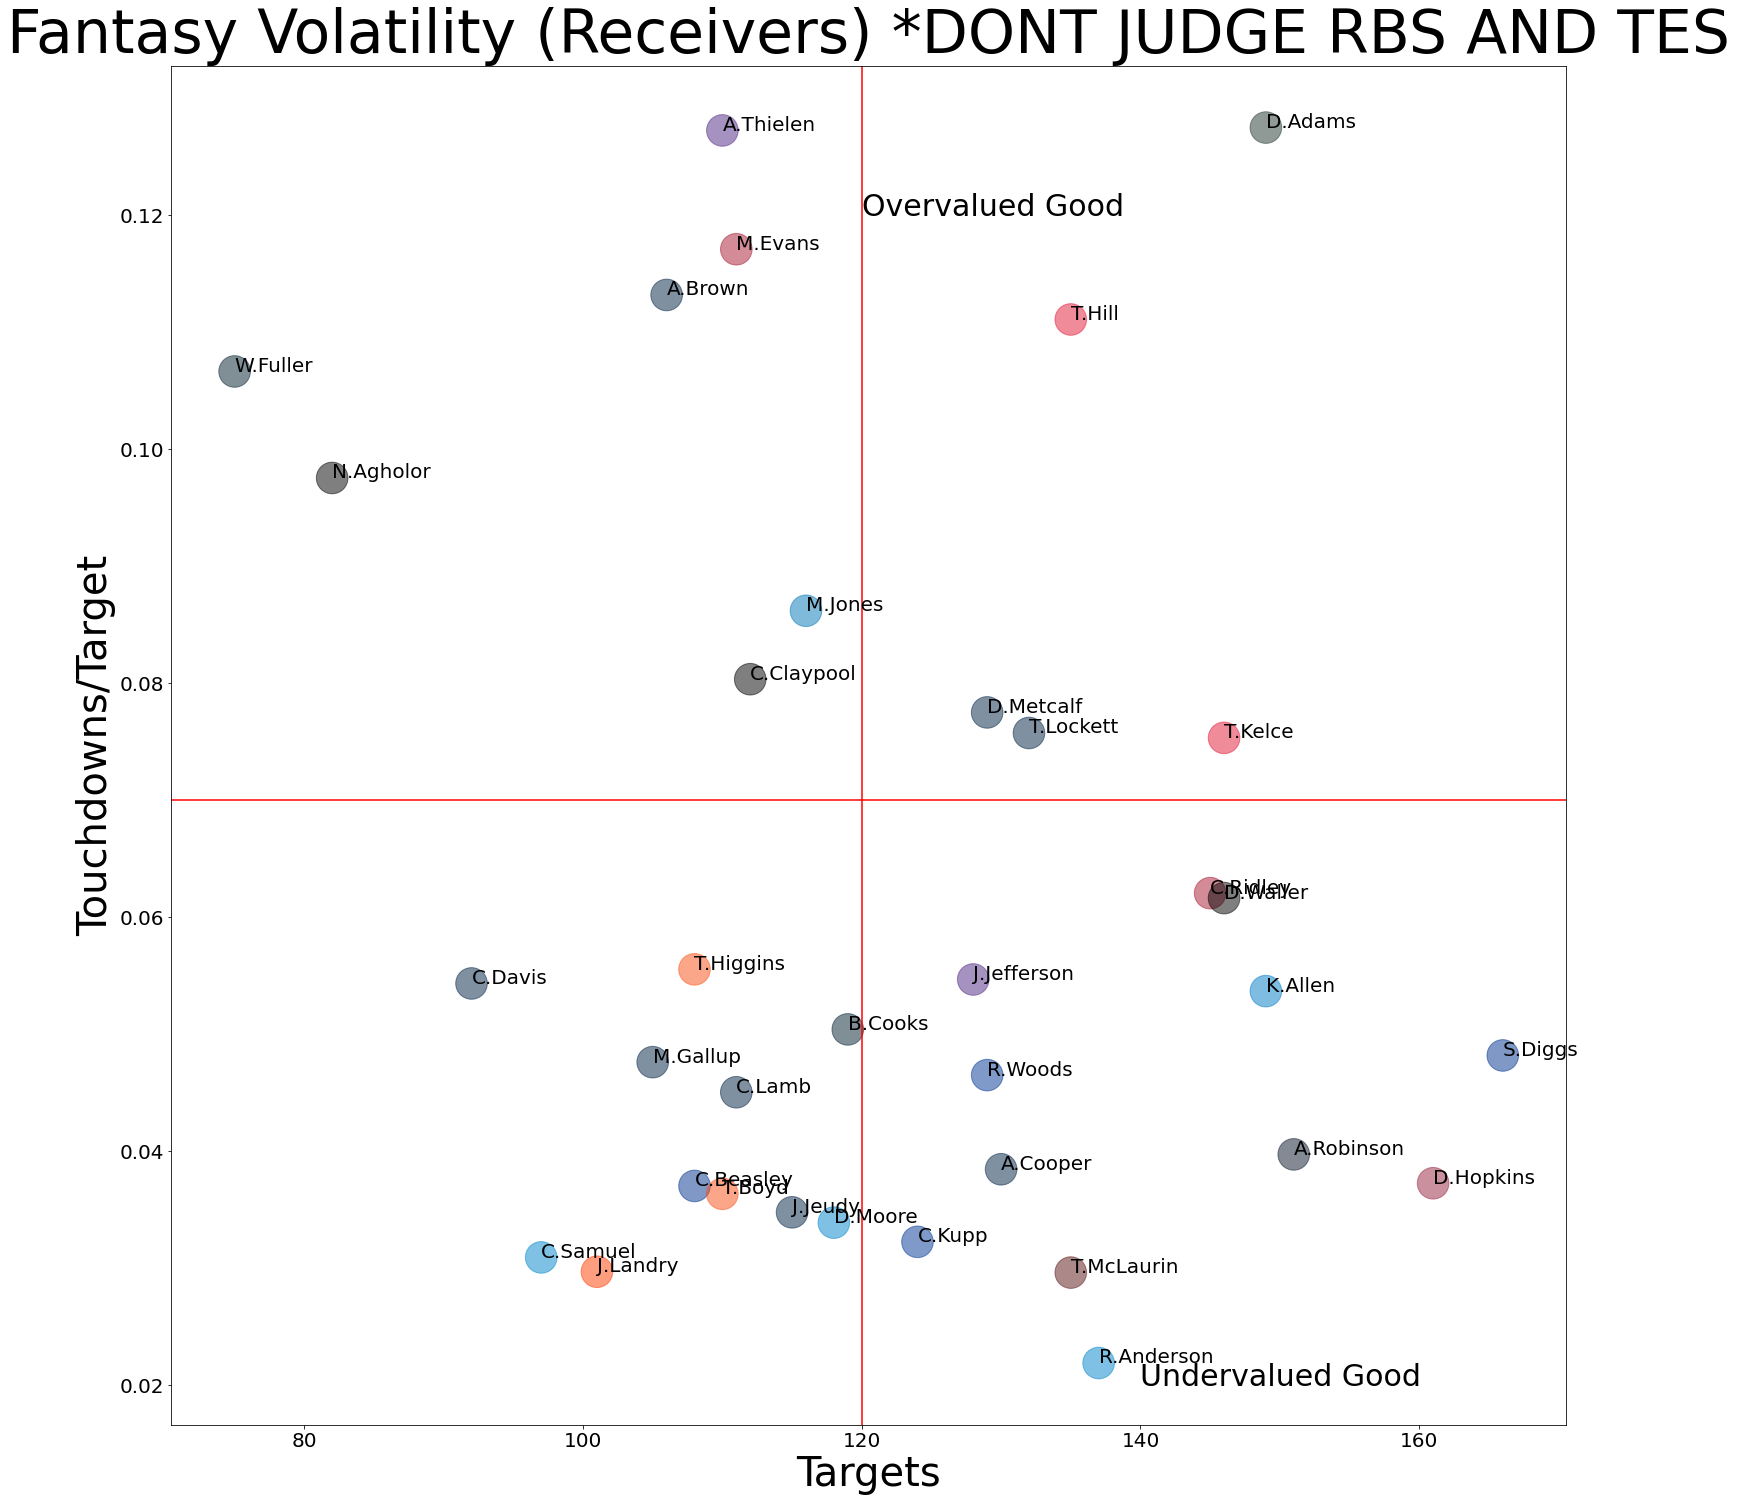

In [34]:
z = top_25['receiver_player_name']
x = top_25['targets']
y = top_25['touchdown']
fig, xy = plt.subplots(figsize = (25,25))
xy.scatter(x, y, s= 1000, color = top_25['team_color'], alpha = 0.5)
plt.title("Fantasy Volatility (Receivers) *DONT JUDGE RBS AND TES", fontsize = 60)
plt.xlabel("Targets", fontsize = 40)
plt.ylabel("Touchdowns/Target", fontsize = 40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.annotate('Overvalued Bad',( 70,0.12), fontsize = 30)
plt.annotate('Overvalued Good',( 120,0.12), fontsize = 30)
plt.annotate('Undervalued Good',( 140,0.02), fontsize = 30)
plt.annotate('Undervalued Bad',( 70,0.02), fontsize = 30)
i=0
while i <35:
    xy.text(x[i],y[i],z[i], fontsize = 20)
    i = i+1
plt.axvline(x=120, color = 'red')
plt.axhline(y=0.07, color = 'red')
plt.show()

In [6]:
df_wr = df.loc[ (df['pass_attempt'] == 1) & (df['receiving_yards'].notnull())]
df_team = df.loc[(df['pass_attempt'] == 1) & (df['receiving_yards'].notnull())]
df_team = df.groupby(['posteam'], 
                 as_index = False).agg({'pass_attempt' : 'sum', 'receiving_yards' : 'sum'})
df_wr = df.groupby(['receiver_player_id', 'receiver_player_name','posteam'], 
                 as_index = False).agg({'receiving_yards' : 'sum', 'pass_attempt' : 'sum', 'yards_gained' : 'mean', 'touchdown' : 'mean'}) 
#df_wr['1down%'] = 1/count
df_wr = df_wr.loc[df_wr.receiving_yards >100]
df_team['t_yards'] = df_team['receiving_yards']/ df_team['pass_attempt']
del df_team['receiving_yards']
df_wr.sort_values('receiving_yards', ascending = False, inplace = True)
df_wr = pd.merge(df_wr,df_team, on = 'posteam')
df_wr['team_attempt'] = df_wr['pass_attempt_y']
df_wr['player_attempt'] = df_wr['pass_attempt_x']
df_wr['p_yards'] = df_wr['yards_gained']
del df_wr['pass_attempt_y']
del df_wr['pass_attempt_x']
del df_wr['yards_gained']
df_wr

,receiver_player_id,receiver_player_name,posteam,receiving_yards,touchdown,t_yards,team_attempt,player_attempt,p_yards
0,00-0033908,C.Kupp,LA,1947.0,0.088542,7.633385,641.0,192.0,10.151042
1,00-0036415,V.Jefferson,LA,802.0,0.067416,7.633385,641.0,89.0,9.011236
2,00-0033110,T.Higbee,LA,560.0,0.082353,7.633385,641.0,85.0,6.588235
3,00-0030431,R.Woods,LA,556.0,0.071429,7.633385,641.0,70.0,7.971429
4,00-0031235,O.Beckham,LA,305.0,0.102041,7.633385,641.0,49.0,6.224490
...,...,...,...,...,...,...,...,...,...
285,00-0032972,D.Booker,NYG,268.0,0.022222,5.470774,633.0,45.0,5.955556
286,00-0034844,S.Barkley,NYG,263.0,0.035088,5.470774,633.0,57.0,4.614035
287,00-0027981,K.Rudolph,NYG,257.0,0.025000,5.470774,633.0,40.0,6.475000
288,00-0033460,J.Ross,NYG,224.0,0.050000,5.470774,633.0,20.0,11.200000


In [7]:
top_25 = df_wr.sort_values(by = 'receiving_yards', ascending = False)[:35]
top_25['target_share'] = top_25['player_attempt']/top_25['team_attempt']
team_logo_colors = nfl.load_team_logo_data()
#top_25['RAC'] = 
df_wr = df_wr.loc[df['receiver_player_id'].isin(top_25['receiver_player_id'])]

top_25 = top_25.merge(team_logo_colors[['team_abbr', 'team_color', 'team_color2']].rename(columns = {'team_abbr': 'posteam'}), on = 'posteam')

df_wr = df_wr.merge(team_logo_colors[['team_abbr', 'team_color', 'team_color2']].rename(columns = {'team_abbr': 'posteam'}), on = 'posteam')

top_25

,receiver_player_id,receiver_player_name,posteam,receiving_yards,touchdown,t_yards,team_attempt,player_attempt,p_yards,target_share,team_color,team_color2
0,00-0033908,C.Kupp,LA,1947.0,0.088542,7.633385,641.0,192.0,10.151042,0.299532,#003594,#FFD100
1,00-0036322,J.Jefferson,MIN,1616.0,0.058824,6.985871,637.0,170.0,9.505882,0.266876,#4F2683,#FFC62F
2,00-0031381,D.Adams,GB,1553.0,0.065089,7.207006,628.0,169.0,9.189349,0.269108,#203731,#FFB612
3,00-0036900,J.Chase,CIN,1455.0,0.109375,7.840131,613.0,128.0,11.367188,0.208809,#FB4F14,#000000
4,00-0036410,T.Higgins,CIN,1091.0,0.054054,7.840131,613.0,111.0,9.846847,0.181077,#FB4F14,#000000
5,00-0035719,D.Samuel,SF,1397.0,0.049587,8.067395,549.0,121.0,11.545455,0.220401,#AA0000,#B3995D
6,00-0033288,G.Kittle,SF,910.0,0.063830,8.067395,549.0,94.0,9.680851,0.171220,#AA0000,#B3995D
7,00-0034753,M.Andrews,BAL,1361.0,0.056962,6.321481,675.0,158.0,8.639241,0.234074,#241773,#9E7C0C
8,00-0035662,M.Brown,BAL,1008.0,0.040816,6.321481,675.0,147.0,6.857143,0.217778,#241773,#9E7C0C
9,00-0033040,T.Hill,KC,1239.0,0.062893,6.990071,705.0,159.0,7.792453,0.225532,#E31837,#FFB612


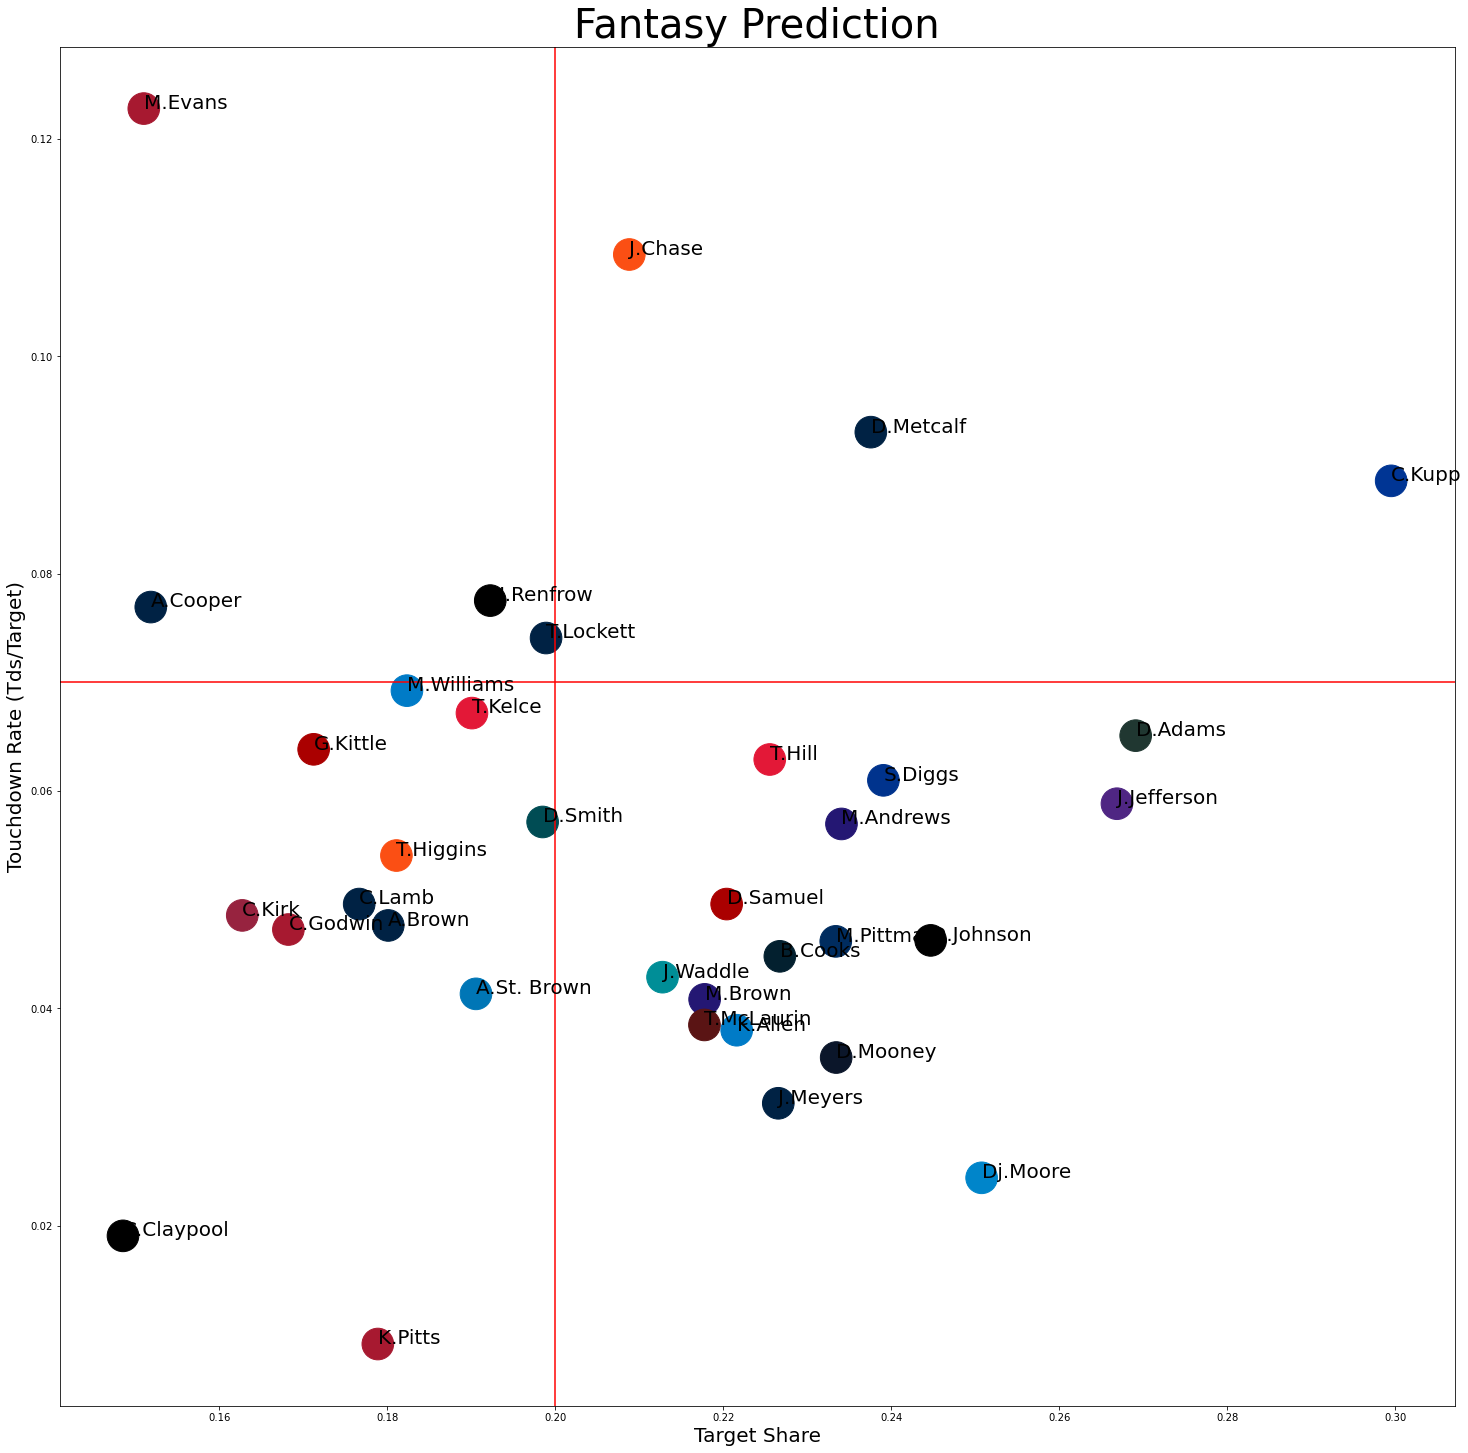

In [8]:
z = top_25['receiver_player_name']
x = top_25['target_share']
y = top_25['touchdown']
fig, xy = plt.subplots(figsize = (25,25))
xy.scatter(x, y, s= 1000, color = top_25['team_color'])
plt.title("Fantasy Prediction", fontsize = 40)
plt.xlabel("Target Share", fontsize = 20)
plt.ylabel("Touchdown Rate (Tds/Target)", fontsize = 20)
i=0
while i <35:
    xy.text(x[i],y[i],z[i], fontsize = 20)
    i = i+1
plt.axvline(x=0.2, color = 'red')
plt.axhline(y=0.07, color = 'red')
plt.show()

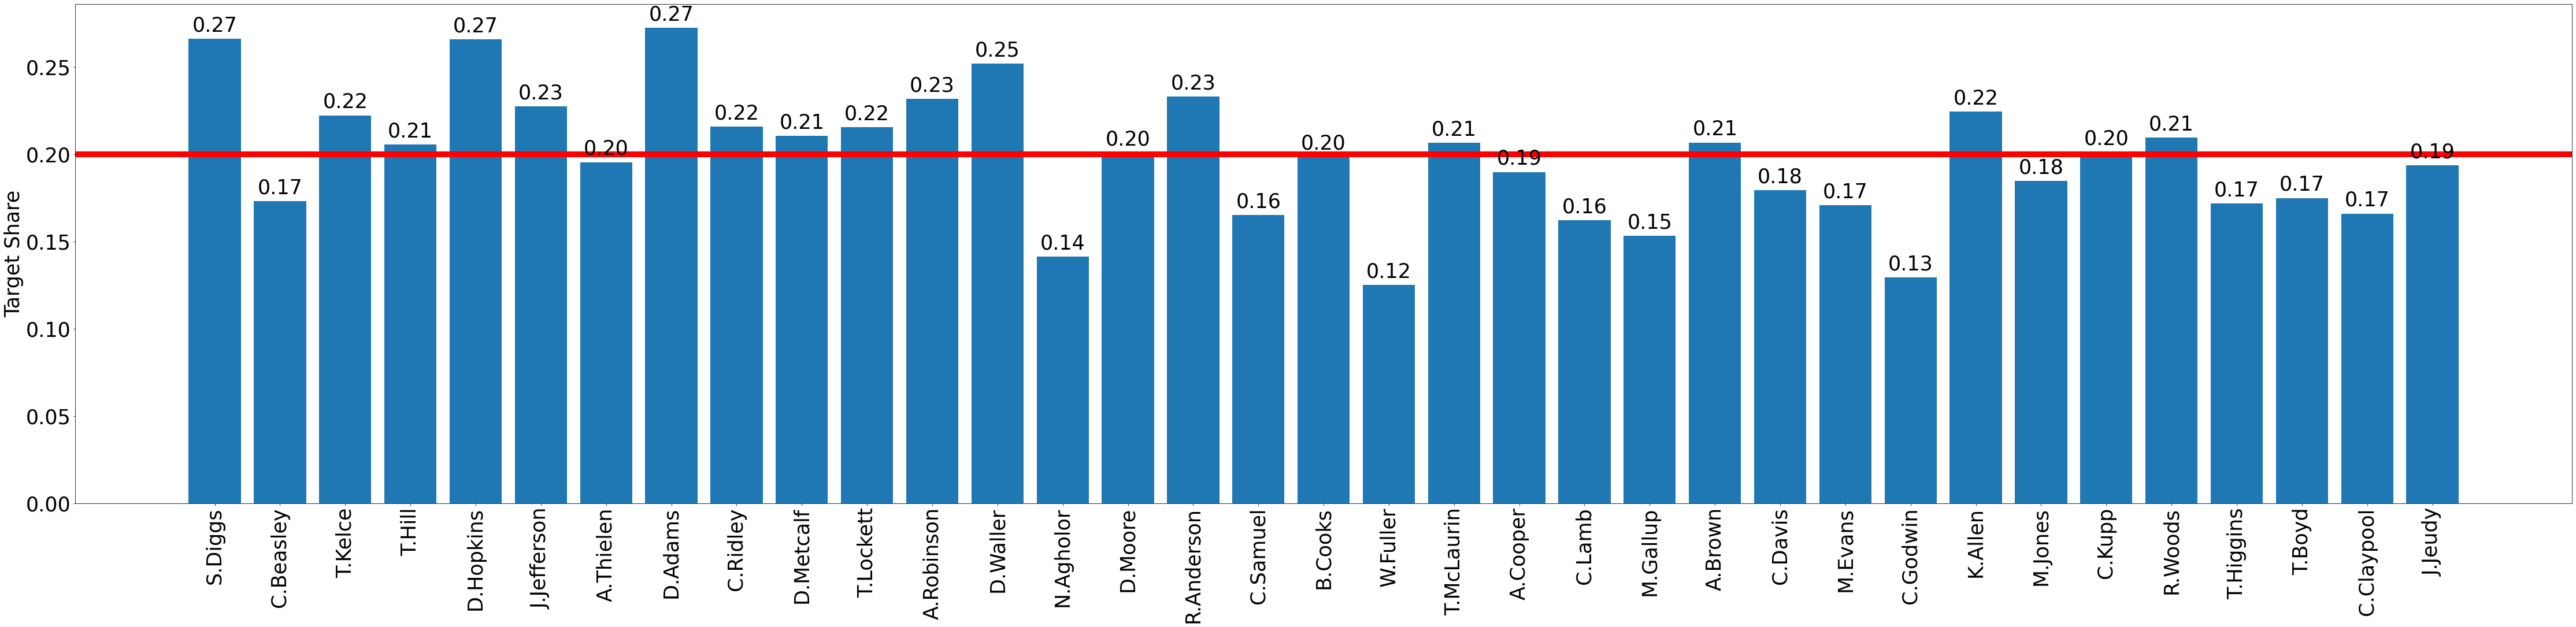

In [124]:
#for i in top_25['target_share']
left = -1
right = 0
"""""for i in top_25['target_share']:
    pivot = len(top_25['target_share'])/2
    count = 0
    print(top_25['target_share'][pivot])
    if i > top_25['target_share'][pivot] & left == -1:
        left = count
    if top_25['target_share'][len(top_25['target_share']-1)-count] < top_25['target_share'][pivot] & right == 0:
        right = (len(top_25['target_share'])-1)-count
    count = count +1
    if left != -1 & right != 0:
        z = top_25[left]
        top_25[left] = top_25[right]
        top_25[right] = z
        i = 0
        count = 0
        left = -1
        right = 0
    if count == (len(top_25['target_share'])-1)-count:
        break"""
fig = plt.figure()
ax = fig.add_axes([0,0,10,3])
langs = top_25['receiver_player_name']
students = top_25['target_share']
ax.bar(langs,students)
plt.ylabel("Target Share", fontsize = 35)
plt.xticks(fontsize =35, rotation = 90)
plt.yticks(fontsize = 35)
plt.axhline(y = 0.2, color = 'red', linewidth = 10)
for bar in ax.patches:
     ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()+0.005), ha='center', va='center',
                   size=35, xytext=(0, 8),
                   textcoords='offset points')
plt.show()